In [1]:
%matplotlib inline
import glob
import os
import numpy as np
import numba as nb
import awkward as ak
import matplotlib.pyplot as plt
import uproot
import uproot3
from coffea import hist
from cycler import cycler
import coffea.processor as processor

In [2]:
fileset = {'tHq': ['root://xcache//store/mc/RunIISummer16NanoAODv5/THQ_Hincl_13TeV-madgraph-pythia8_TuneCUETP8M1/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7-v1/100000/38E83594-51BD-7D46-B96D-620DD60078A7.root',
                    'root://xcache//store/mc/RunIISummer16NanoAODv5/THQ_Hincl_13TeV-madgraph-pythia8_TuneCUETP8M1/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7-v1/100000/3A3BA22C-AA71-2544-810A-6DF4C6BA96FC.root',
                    'root://xcache//store/mc/RunIISummer16NanoAODv5/THQ_Hincl_13TeV-madgraph-pythia8_TuneCUETP8M1/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7-v1/100000/3AFB1F42-BC6D-D44E-86FD-DB93C83F88FF.root',
                    'root://xcache//store/mc/RunIISummer16NanoAODv5/THQ_Hincl_13TeV-madgraph-pythia8_TuneCUETP8M1/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7-v1/100000/A37B4B7A-FB5B-484D-8577-40B860D77D23.root',
                    'root://xcache//store/mc/RunIISummer16NanoAODv5/THQ_Hincl_13TeV-madgraph-pythia8_TuneCUETP8M1/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7-v1/100000/E3C7548E-EE40-BA45-9130-17DF56FBE537.root',
                    'root://xcache//store/mc/RunIISummer16NanoAODv5/THQ_Hincl_13TeV-madgraph-pythia8_TuneCUETP8M1/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7-v1/100000/F9EFC559-09E9-BB48-8150-9AA8B7F02C1C.root'],
             'tHW': ['root://xcache//store/mc/RunIISummer16NanoAODv5/THW_Hincl_13TeV-madgraph-pythia8_TuneCUETP8M1/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7-v1/70000/2806293E-D1DD-4A49-A274-0CC3BA57BBDF.root',
                     'root://xcache//store/mc/RunIISummer16NanoAODv5/THW_Hincl_13TeV-madgraph-pythia8_TuneCUETP8M1/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7-v1/70000/2F19962E-1DFB-A14A-91C2-30B69D5651D3.root',
                     'root://xcache//store/mc/RunIISummer16NanoAODv5/THW_Hincl_13TeV-madgraph-pythia8_TuneCUETP8M1/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7-v1/70000/D9744111-ED04-3F47-A52A-C18424F01609.root',
                     'root://xcache//store/mc/RunIISummer16NanoAODv5/THW_Hincl_13TeV-madgraph-pythia8_TuneCUETP8M1/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7-v1/70000/E4CFA095-E7DB-B449-986D-1A5D21FD1D50.root'],
             'ttW': ['root://xcache//store/mc/RunIISummer16NanoAODv5/TTWJetsToLNu_TuneCUETP8M1_13TeV-amcatnloFXFX-madspin-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/30000/2E92C41D-6F94-F84B-A46B-61EDFFBEFE5B.root',
                     'root://xcache//store/mc/RunIISummer16NanoAODv5/TTWJetsToLNu_TuneCUETP8M1_13TeV-amcatnloFXFX-madspin-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/30000/69D60020-75AF-CA42-8D94-99957EEF71DC.root',
                     'root://xcache//store/mc/RunIISummer16NanoAODv5/TTWJetsToLNu_TuneCUETP8M1_13TeV-amcatnloFXFX-madspin-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/30000/AB62AEC8-6F15-1947-9E22-0059E196EBE5.root',
                     'root://xcache//store/mc/RunIISummer16NanoAODv5/TTWJetsToLNu_TuneCUETP8M1_13TeV-amcatnloFXFX-madspin-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/30000/EA538168-AF02-774C-9648-9BF72471384D.root',
                     'root://xcache//store/mc/RunIISummer16NanoAODv5/TTWJetsToLNu_TuneCUETP8M1_13TeV-amcatnloFXFX-madspin-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext2-v1/120000/2CF42572-162F-F14F-B7CA-96DABCD83589.root',
                     'root://xcache//store/mc/RunIISummer16NanoAODv5/TTWJetsToLNu_TuneCUETP8M1_13TeV-amcatnloFXFX-madspin-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext2-v1/120000/4B8C7791-6DFF-5748-B6AF-7FE0F6B5CA1D.root',
                     'root://xcache//store/mc/RunIISummer16NanoAODv5/TTWJetsToLNu_TuneCUETP8M1_13TeV-amcatnloFXFX-madspin-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext2-v1/120000/5BF4BF41-CFDB-F447-B034-D806DFE3252C.root',
                     'root://xcache//store/mc/RunIISummer16NanoAODv5/TTWJetsToLNu_TuneCUETP8M1_13TeV-amcatnloFXFX-madspin-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext2-v1/120000/794E6532-E576-FB41-A23F-CD078AABC85E.root',
                     'root://xcache//store/mc/RunIISummer16NanoAODv5/TTWJetsToLNu_TuneCUETP8M1_13TeV-amcatnloFXFX-madspin-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext2-v1/120000/8102B971-D215-004C-93EE-AE9A6C1907B3.root',
                     'root://xcache//store/mc/RunIISummer16NanoAODv5/TTWJetsToLNu_TuneCUETP8M1_13TeV-amcatnloFXFX-madspin-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext2-v1/120000/EF9DC33E-137A-0640-976B-8C3AC89F534E.root',
                     'root://xcache//store/mc/RunIISummer16NanoAODv5/TTWJetsToLNu_TuneCUETP8M1_13TeV-amcatnloFXFX-madspin-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext2-v1/120000/FF4BF1D3-A06A-0F44-8458-37984DEA5CAD.root'],
             'ttWJets': ['root://xcache//store/mc/RunIISummer16NanoAODv5/ttWJets_13TeV_madgraphMLM/NANOAODSIM/Nano1June2019_102X_mcRun2_asymptotic_v7-v1/250000/028BA117-69BE-B74D-9862-2170CA64B11C.root',
                         'root://xcache//store/mc/RunIISummer16NanoAODv5/ttWJets_13TeV_madgraphMLM/NANOAODSIM/Nano1June2019_102X_mcRun2_asymptotic_v7-v1/250000/1ABC137E-5233-044E-B3FE-8574DC6FC943.root',
                         'root://xcache//store/mc/RunIISummer16NanoAODv5/ttWJets_13TeV_madgraphMLM/NANOAODSIM/Nano1June2019_102X_mcRun2_asymptotic_v7-v1/250000/2274637A-76F8-4049-B651-F60817E6F775.root',
                         'root://xcache//store/mc/RunIISummer16NanoAODv5/ttWJets_13TeV_madgraphMLM/NANOAODSIM/Nano1June2019_102X_mcRun2_asymptotic_v7-v1/250000/2E4A4356-C68F-1B4C-A920-656C7F519328.root',
                         'root://xcache//store/mc/RunIISummer16NanoAODv5/ttWJets_13TeV_madgraphMLM/NANOAODSIM/Nano1June2019_102X_mcRun2_asymptotic_v7-v1/250000/3BEEC74F-9E73-1745-BCA2-09E2725C3979.root',
                         'root://xcache//store/mc/RunIISummer16NanoAODv5/ttWJets_13TeV_madgraphMLM/NANOAODSIM/Nano1June2019_102X_mcRun2_asymptotic_v7-v1/250000/80CEEF63-623A-8144-AEE6-0BAEB5BC314B.root',
                         'root://xcache//store/mc/RunIISummer16NanoAODv5/ttWJets_13TeV_madgraphMLM/NANOAODSIM/Nano1June2019_102X_mcRun2_asymptotic_v7-v1/250000/DA330C53-B0BE-A84F-9308-1BBBC38B095C.root',
                         'root://xcache//store/mc/RunIISummer16NanoAODv5/ttWJets_13TeV_madgraphMLM/NANOAODSIM/Nano1June2019_102X_mcRun2_asymptotic_v7-v1/250000/E3EE47DE-4DBB-FC48-84AB-4F9C26B9CCE8.root',
                         'root://xcache//store/mc/RunIISummer16NanoAODv5/ttWJets_13TeV_madgraphMLM/NANOAODSIM/Nano1June2019_102X_mcRun2_asymptotic_v7-v1/250000/F597371F-E866-6B47-A185-268F927E3372.root'],
            'ttZ': ['root://xcache//store/mc/RunIISummer16NanoAODv5/TTZToLLNuNu_M-10_TuneCUETP8M1_13TeV-amcatnlo-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/40000/5B1499CC-2B27-4F44-95BD-7B1C9907ACCD.root',
                     'root://xcache//store/mc/RunIISummer16NanoAODv5/TTZToLLNuNu_M-10_TuneCUETP8M1_13TeV-amcatnlo-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/40000/CDA99173-3C05-1A47-AE70-587B44E6348B.root',
                     'root://xcache//store/mc/RunIISummer16NanoAODv5/TTZToLLNuNu_M-10_TuneCUETP8M1_13TeV-amcatnlo-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/60000/28C6248C-D55F-8044-BDFB-696BAC0FE329.root',
                     'root://xcache//store/mc/RunIISummer16NanoAODv5/TTZToLLNuNu_M-10_TuneCUETP8M1_13TeV-amcatnlo-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/60000/F8A11DF6-4013-6F4C-BBE9-1759933FF20F.root',
                     'root://xcache//store/mc/RunIISummer16NanoAODv5/TTZToLLNuNu_M-10_TuneCUETP8M1_13TeV-amcatnlo-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext2-v1/110000/308939D7-DA54-E949-958D-7B495723DB4C.root',
                     'root://xcache//store/mc/RunIISummer16NanoAODv5/TTZToLLNuNu_M-10_TuneCUETP8M1_13TeV-amcatnlo-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext2-v1/110000/3A1F9F01-E4BC-A347-8D57-8DBFAA890EAB.root',
                     'root://xcache//store/mc/RunIISummer16NanoAODv5/TTZToLLNuNu_M-10_TuneCUETP8M1_13TeV-amcatnlo-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext2-v1/110000/BF1A0533-7A59-A04C-9A6C-6A5EA4697A06.root',
                     'root://xcache//store/mc/RunIISummer16NanoAODv5/TTZToLLNuNu_M-10_TuneCUETP8M1_13TeV-amcatnlo-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext2-v1/120000/191705EA-1891-6942-8CD2-CD70B0E58893.root',
                     'root://xcache//store/mc/RunIISummer16NanoAODv5/TTZToLLNuNu_M-10_TuneCUETP8M1_13TeV-amcatnlo-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext2-v1/120000/27BD2647-8A2F-7C45-964F-F0277A0A011D.root',
                     'root://xcache//store/mc/RunIISummer16NanoAODv5/TTZToLLNuNu_M-10_TuneCUETP8M1_13TeV-amcatnlo-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext2-v1/120000/56608BD3-2A0E-1941-8386-F498EEC16A61.root',
                     'root://xcache//store/mc/RunIISummer16NanoAODv5/TTZToLLNuNu_M-10_TuneCUETP8M1_13TeV-amcatnlo-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext2-v1/120000/7D898E0C-0752-B948-8BA7-7016BD151BD2.root',
                     'root://xcache//store/mc/RunIISummer16NanoAODv5/TTZToLLNuNu_M-10_TuneCUETP8M1_13TeV-amcatnlo-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext2-v1/120000/97637969-BD4B-0640-8158-17722CB9F631.root',
                     'root://xcache//store/mc/RunIISummer16NanoAODv5/TTZToLLNuNu_M-10_TuneCUETP8M1_13TeV-amcatnlo-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext2-v1/120000/9BEAB5BD-5C7E-B54A-B42E-D81FA4B30A2B.root',
                     'root://xcache//store/mc/RunIISummer16NanoAODv5/TTZToLLNuNu_M-10_TuneCUETP8M1_13TeV-amcatnlo-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext2-v1/120000/C7073B6B-C69E-1B42-B378-7FAC8FF4E856.root',
                     'root://xcache//store/mc/RunIISummer16NanoAODv5/TTZToLLNuNu_M-10_TuneCUETP8M1_13TeV-amcatnlo-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext2-v1/120000/FF986F85-71C4-064D-9759-B0C1ACAE9454.root',
                     'root://xcache//store/mc/RunIISummer16NanoAODv5/TTZToLLNuNu_M-10_TuneCUETP8M1_13TeV-amcatnlo-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext3-v1/130000/34275A2F-313A-6D4D-A7EC-DD18BF9C413B.root',
                     'root://xcache//store/mc/RunIISummer16NanoAODv5/TTZToLLNuNu_M-10_TuneCUETP8M1_13TeV-amcatnlo-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext3-v1/130000/392B4635-E8FF-924C-A5B5-51D19C670F69.root',
                     'root://xcache//store/mc/RunIISummer16NanoAODv5/TTZToLLNuNu_M-10_TuneCUETP8M1_13TeV-amcatnlo-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext3-v1/130000/4C139140-A677-AB49-9DF9-5BBF4FA850D2.root',
                     'root://xcache//store/mc/RunIISummer16NanoAODv5/TTZToLLNuNu_M-10_TuneCUETP8M1_13TeV-amcatnlo-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext3-v1/130000/80416EBE-074F-5C4A-AE5F-6403A9F9E9D9.root',
                     'root://xcache//store/mc/RunIISummer16NanoAODv5/TTZToLLNuNu_M-10_TuneCUETP8M1_13TeV-amcatnlo-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext3-v1/130000/96F276D6-1C38-9F4F-93CE-503B860AB550.root',
                     'root://xcache//store/mc/RunIISummer16NanoAODv5/TTZToLLNuNu_M-10_TuneCUETP8M1_13TeV-amcatnlo-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext3-v1/130000/A1AD2099-D5D6-7A47-AEB6-562F68B04441.root',
                     'root://xcache//store/mc/RunIISummer16NanoAODv5/TTZToLLNuNu_M-10_TuneCUETP8M1_13TeV-amcatnlo-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext3-v1/130000/AAD8B507-CEC2-CE44-9B23-822A451F426C.root'],
            'ttZJets': ['root://xcache//store/mc/RunIISummer16NanoAODv5/ttZJets_13TeV_madgraphMLM/NANOAODSIM/Nano1June2019_102X_mcRun2_asymptotic_v7-v1/40000/12857BB7-7239-B94A-A890-7CB3C79BD057.root',
                         'root://xcache//store/mc/RunIISummer16NanoAODv5/ttZJets_13TeV_madgraphMLM/NANOAODSIM/Nano1June2019_102X_mcRun2_asymptotic_v7-v1/40000/193EA450-873A-3047-BA69-3B1D1EABB771.root',
                         'root://xcache//store/mc/RunIISummer16NanoAODv5/ttZJets_13TeV_madgraphMLM/NANOAODSIM/Nano1June2019_102X_mcRun2_asymptotic_v7-v1/40000/21167A9A-2FDD-C240-AF27-FAA935B0057C.root',
                         'root://xcache//store/mc/RunIISummer16NanoAODv5/ttZJets_13TeV_madgraphMLM/NANOAODSIM/Nano1June2019_102X_mcRun2_asymptotic_v7-v1/40000/576C9504-E9B2-484C-88DB-1F087D4BA6A3.root',
                         'root://xcache//store/mc/RunIISummer16NanoAODv5/ttZJets_13TeV_madgraphMLM/NANOAODSIM/Nano1June2019_102X_mcRun2_asymptotic_v7-v1/40000/5C781945-9A98-7F44-B397-F806603C9A01.root',
                         'root://xcache//store/mc/RunIISummer16NanoAODv5/ttZJets_13TeV_madgraphMLM/NANOAODSIM/Nano1June2019_102X_mcRun2_asymptotic_v7-v1/40000/69E6121A-F0DC-8043-991A-049199E4BCC4.root',
                         'root://xcache//store/mc/RunIISummer16NanoAODv5/ttZJets_13TeV_madgraphMLM/NANOAODSIM/Nano1June2019_102X_mcRun2_asymptotic_v7-v1/40000/72EF6B33-D0AA-6540-BA4A-A760E8194589.root',
                         'root://xcache//store/mc/RunIISummer16NanoAODv5/ttZJets_13TeV_madgraphMLM/NANOAODSIM/Nano1June2019_102X_mcRun2_asymptotic_v7-v1/40000/8B2D64F4-D873-124B-AE6A-0503FF7A0427.root',
                         'root://xcache//store/mc/RunIISummer16NanoAODv5/ttZJets_13TeV_madgraphMLM/NANOAODSIM/Nano1June2019_102X_mcRun2_asymptotic_v7-v1/40000/B865F28C-D9B3-0944-8E01-D0D3B01C4F26.root',
                         'root://xcache//store/mc/RunIISummer16NanoAODv5/ttZJets_13TeV_madgraphMLM/NANOAODSIM/Nano1June2019_102X_mcRun2_asymptotic_v7-v1/40000/C2C66219-4FAA-4C4E-95FB-CA259749AAA4.root',
                         'root://xcache//store/mc/RunIISummer16NanoAODv5/ttZJets_13TeV_madgraphMLM/NANOAODSIM/Nano1June2019_102X_mcRun2_asymptotic_v7-v1/40000/DD8A6F4F-52CF-9142-B264-B402A94CFD09.root',
                         'root://xcache//store/mc/RunIISummer16NanoAODv5/ttZJets_13TeV_madgraphMLM/NANOAODSIM/Nano1June2019_102X_mcRun2_asymptotic_v7-v1/40000/E0D9AB84-E0BF-0C49-9B2E-E003587FF335.root'],
            'ttH': ['root://xcache//store/mc/RunIISummer16NanoAODv5/ttHJetToNonbb_M125_13TeV_amcatnloFXFX_madspin_pythia8_mWCutfix/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/100000/05371F7D-77DA-FD4E-BF1F-9C4B6C7B2BF4.root',
                     'root://xcache//store/mc/RunIISummer16NanoAODv5/ttHJetToNonbb_M125_13TeV_amcatnloFXFX_madspin_pythia8_mWCutfix/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/100000/1097F45B-C2CC-034A-98D5-6A2C38F9E957.root',
                     'root://xcache//store/mc/RunIISummer16NanoAODv5/ttHJetToNonbb_M125_13TeV_amcatnloFXFX_madspin_pythia8_mWCutfix/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/100000/144E050B-AC6C-5046-B9BF-3CB1045651D1.root',
                     'root://xcache//store/mc/RunIISummer16NanoAODv5/ttHJetToNonbb_M125_13TeV_amcatnloFXFX_madspin_pythia8_mWCutfix/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/100000/1F8A2052-DD4D-F24B-AEF7-C6C8DB5E42AC.root',
                     'root://xcache//store/mc/RunIISummer16NanoAODv5/ttHJetToNonbb_M125_13TeV_amcatnloFXFX_madspin_pythia8_mWCutfix/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/100000/2BDDFDC0-1D0E-4141-BCB6-98FDE981E522.root',
                     'root://xcache//store/mc/RunIISummer16NanoAODv5/ttHJetToNonbb_M125_13TeV_amcatnloFXFX_madspin_pythia8_mWCutfix/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/100000/3D3743BD-A2B7-F34E-BBD3-FE98A055B935.root',
                     'root://xcache//store/mc/RunIISummer16NanoAODv5/ttHJetToNonbb_M125_13TeV_amcatnloFXFX_madspin_pythia8_mWCutfix/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/100000/70319D0B-46D5-6840-9FA3-49B990C6E117.root',
                     'root://xcache//store/mc/RunIISummer16NanoAODv5/ttHJetToNonbb_M125_13TeV_amcatnloFXFX_madspin_pythia8_mWCutfix/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/100000/7CF51AAB-6C37-F84E-B091-48C8217EE65E.root',
                     'root://xcache//store/mc/RunIISummer16NanoAODv5/ttHJetToNonbb_M125_13TeV_amcatnloFXFX_madspin_pythia8_mWCutfix/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/100000/90463B9A-2AB6-1D4E-9D7F-4E6AA6B4500C.root',
                     'root://xcache//store/mc/RunIISummer16NanoAODv5/ttHJetToNonbb_M125_13TeV_amcatnloFXFX_madspin_pythia8_mWCutfix/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/100000/A922DC1E-905C-0240-81D7-8470159370D4.root',
                     'root://xcache//store/mc/RunIISummer16NanoAODv5/ttHJetToNonbb_M125_13TeV_amcatnloFXFX_madspin_pythia8_mWCutfix/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/100000/C6BD7A39-4592-F84F-99FB-52C1BBC3F066.root',
                     'root://xcache//store/mc/RunIISummer16NanoAODv5/ttHJetToNonbb_M125_13TeV_amcatnloFXFX_madspin_pythia8_mWCutfix/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/100000/EE7FEAE7-21B8-4547-A0C7-589B3DDA0704.root',
                     'root://xcache//store/mc/RunIISummer16NanoAODv5/ttHJetToNonbb_M125_13TeV_amcatnloFXFX_madspin_pythia8_mWCutfix/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/100000/F5A64CA8-059C-4D46-A2C4-9B679A4B911F.root',
                     'root://xcache//store/mc/RunIISummer16NanoAODv5/ttHJetToNonbb_M125_13TeV_amcatnloFXFX_madspin_pythia8_mWCutfix/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/120000/83CB02F7-FFA9-CD47-9EE6-4D444843595E.root'],
            'WZ': ['root://xcache//store/mc/RunIISummer16NanoAODv5/WZTo3LNu_TuneCUETP8M1_13TeV-powheg-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7-v1/120000/222071C0-CF04-1E4B-B65E-49D18B91DE8B.root',
                     'root://xcache//store/mc/RunIISummer16NanoAODv5/WZTo3LNu_TuneCUETP8M1_13TeV-powheg-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7-v1/120000/7EC09E9F-A061-6D46-83DB-E91A8479CD7A.root',
                     'root://xcache//store/mc/RunIISummer16NanoAODv5/WZTo3LNu_TuneCUETP8M1_13TeV-powheg-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7-v1/120000/9FA39757-C2AB-F34E-A2E8-3D728B605FD1.root',
                     'root://xcache//store/mc/RunIISummer16NanoAODv5/WZTo3LNu_TuneCUETP8M1_13TeV-powheg-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7-v1/120000/E539344F-0815-064E-BFB2-14D265A460FA.root',
                     'root://xcache//store/mc/RunIISummer16NanoAODv5/WZTo3LNu_TuneCUETP8M1_13TeV-powheg-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/110000/0571F847-7582-0D43-A65D-BB1DF150BE77.root',
                     'root://xcache//store/mc/RunIISummer16NanoAODv5/WZTo3LNu_TuneCUETP8M1_13TeV-powheg-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/110000/1875117C-8380-0C45-A701-B221443E9010.root',
                     'root://xcache//store/mc/RunIISummer16NanoAODv5/WZTo3LNu_TuneCUETP8M1_13TeV-powheg-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/110000/23490416-1F0E-364F-B5D9-7F7C92360277.root',
                     'root://xcache//store/mc/RunIISummer16NanoAODv5/WZTo3LNu_TuneCUETP8M1_13TeV-powheg-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/110000/423A6069-CE53-A94F-8D9F-75342F9F9273.root',
                     'root://xcache//store/mc/RunIISummer16NanoAODv5/WZTo3LNu_TuneCUETP8M1_13TeV-powheg-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/110000/42816FAA-2580-7146-93BE-C9482FC56E5F.root',
                     'root://xcache//store/mc/RunIISummer16NanoAODv5/WZTo3LNu_TuneCUETP8M1_13TeV-powheg-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/110000/4DCA8EC5-BC5C-3447-8A91-C21142F57775.root',
                     'root://xcache//store/mc/RunIISummer16NanoAODv5/WZTo3LNu_TuneCUETP8M1_13TeV-powheg-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/110000/4F6290B2-15A7-C840-8544-26FBA7D62129.root',
                     'root://xcache//store/mc/RunIISummer16NanoAODv5/WZTo3LNu_TuneCUETP8M1_13TeV-powheg-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/110000/62527AE1-E838-BF44-AA33-C145C74F2196.root',
                     'root://xcache//store/mc/RunIISummer16NanoAODv5/WZTo3LNu_TuneCUETP8M1_13TeV-powheg-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/110000/64F0D9CB-C675-3F49-ACE2-E06CD5CFFA13.root',
                     'root://xcache//store/mc/RunIISummer16NanoAODv5/WZTo3LNu_TuneCUETP8M1_13TeV-powheg-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/110000/669C5D12-E263-0E41-9F49-B277198FA882.root',
                     'root://xcache//store/mc/RunIISummer16NanoAODv5/WZTo3LNu_TuneCUETP8M1_13TeV-powheg-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/110000/788641E9-D641-0F40-AC0D-69E335F7E04D.root',
                     'root://xcache//store/mc/RunIISummer16NanoAODv5/WZTo3LNu_TuneCUETP8M1_13TeV-powheg-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/110000/A2DCB4B2-9A3B-6049-B845-8BC13C623736.root',
                     'root://xcache//store/mc/RunIISummer16NanoAODv5/WZTo3LNu_TuneCUETP8M1_13TeV-powheg-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/110000/B5189B28-6A9D-9240-A943-830C76F1C4CE.root',
                     'root://xcache//store/mc/RunIISummer16NanoAODv5/WZTo3LNu_TuneCUETP8M1_13TeV-powheg-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/110000/CFBDFA7E-FA6A-9E40-976A-5E2CAE843CE2.root',
                     'root://xcache//store/mc/RunIISummer16NanoAODv5/WZTo3LNu_TuneCUETP8M1_13TeV-powheg-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/110000/D52DFC49-0016-2941-BEB6-7958728B782E.root',
                     'root://xcache//store/mc/RunIISummer16NanoAODv5/WZTo3LNu_TuneCUETP8M1_13TeV-powheg-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/110000/DD34D24C-D3E4-6046-AA01-EDF356AC83CB.root',
                     'root://xcache//store/mc/RunIISummer16NanoAODv5/WZTo3LNu_TuneCUETP8M1_13TeV-powheg-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/110000/E4035DC3-ACD2-0440-805F-F8C46406E0A0.root',
                     'root://xcache//store/mc/RunIISummer16NanoAODv5/WZTo3LNu_TuneCUETP8M1_13TeV-powheg-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/110000/FED349E0-72BB-7E4F-B776-F9BB8C278B27.root'],
            'ZZ': ['root://xcache//store/mc/RunIISummer16NanoAODv5/ZZTo4L_13TeV_powheg_pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7-v1/30000/010B000A-0883-064B-B250-A6159DB2603A.root',
                     'root://xcache//store/mc/RunIISummer16NanoAODv5/ZZTo4L_13TeV_powheg_pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7-v1/30000/1B4E5034-DD6A-DB40-882D-20B5C42A9722.root',
                     'root://xcache//store/mc/RunIISummer16NanoAODv5/ZZTo4L_13TeV_powheg_pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7-v1/30000/462F4643-6F37-EA42-8F6C-90B91C23A731.root',
                     'root://xcache//store/mc/RunIISummer16NanoAODv5/ZZTo4L_13TeV_powheg_pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7-v1/30000/465A6EA9-E768-E642-8A73-B27E21BD3595.root',
                     'root://xcache//store/mc/RunIISummer16NanoAODv5/ZZTo4L_13TeV_powheg_pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7-v1/30000/46E99F08-CB4C-914F-9CF0-1A9E7DCE8081.root',
                     'root://xcache//store/mc/RunIISummer16NanoAODv5/ZZTo4L_13TeV_powheg_pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7-v1/30000/73D0D73F-E72D-E649-8772-2BECC3D296D7.root',
                     'root://xcache//store/mc/RunIISummer16NanoAODv5/ZZTo4L_13TeV_powheg_pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7-v1/30000/773BDDB0-D100-DA4B-8522-17EB71265BEE.root',
                     'root://xcache//store/mc/RunIISummer16NanoAODv5/ZZTo4L_13TeV_powheg_pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7-v1/30000/D08D925B-BA30-3642-9995-F165FC2542D7.root',
                     'root://xcache//store/mc/RunIISummer16NanoAODv5/ZZTo4L_13TeV_powheg_pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7-v1/30000/DC582D74-81EF-504C-8342-08D42BB17C38.root',
                     'root://xcache//store/mc/RunIISummer16NanoAODv5/ZZTo4L_13TeV_powheg_pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7-v1/30000/FD274208-7DF0-3245-945F-87B17415142E.root'],
            'ZZZ': ['root://xcache//store/mc/RunIISummer16NanoAODv5/ZZZ_TuneCUETP8M1_13TeV-amcatnlo-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7-v1/250000/37FA68CC-B841-7D41-994C-645CFA4BA227.root'],
            'WWZ': ['root://xcache//store/mc/RunIISummer16NanoAODv5/WWZ_TuneCUETP8M1_13TeV-amcatnlo-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7-v1/70000/8034D852-4E18-F441-B1B7-3A4BA82B8963.root',
                     'root://xcache//store/mc/RunIISummer16NanoAODv5/WWZ_TuneCUETP8M1_13TeV-amcatnlo-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7-v1/70000/EE791322-C349-A14A-B49A-75BDAA03482E.root'],
            'WZZ': ['root://xcache//store/mc/RunIISummer16NanoAODv5/WZZ_TuneCUETP8M1_13TeV-amcatnlo-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7-v1/100000/4359B067-2773-4D48-A235-CD33C3A20AD9.root',
                     'root://xcache//store/mc/RunIISummer16NanoAODv5/WZZ_TuneCUETP8M1_13TeV-amcatnlo-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7-v1/100000/50D0F171-4A01-644A-A1D9-6BF1D915DF2A.root',
                     'root://xcache//store/mc/RunIISummer16NanoAODv5/WZZ_TuneCUETP8M1_13TeV-amcatnlo-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7-v1/100000/61EDBB45-0A24-1847-9FD6-222D7D8D6AF3.root'],
            'tttt': ['root://xcache//store/mc/RunIISummer16NanoAODv5/TTTT_TuneCUETP8M1_13TeV-amcatnlo-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7-v1/250000/E23424C4-B553-114D-A9F2-9E2F21D641F6.root',
                     'root://xcache//store/mc/RunIISummer16NanoAODv5/TTTT_TuneCUETP8M1_13TeV-amcatnlo-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7-v1/250000/ED3B459F-A945-C847-9B80-B847C3487049.root'],
            'WpWp': ['root://xcache//store/mc/RunIISummer16NanoAODv5/WpWpJJ_EWK-QCD_TuneCUETP8M1_13TeV-madgraph-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7-v1/120000/025F6345-BE37-DF45-B582-25EA8300B4E8.root'],
          }

In [3]:
class SignalProcessor(processor.ProcessorABC):
    def __init__(self):
        dataset_axis = hist.Cat("dataset", "")
        lll_Lep3Pt_axis = hist.Bin("lll_Lep3Pt", "3rd Lepton $p_T$ [GeV]", 18, 0, 90)
        lll_detaFwdJetBJet_axis = hist.Bin("lll_detaFwdJetBJet", "$\Delta \eta$ max fwd jet and leading bjet", 18, 0, 6)
        lll_detaFwdJetClosestLep_axis = hist.Bin("lll_detaFwdJetClosestLep", "$\Delta \eta$ max fwd jet and closest lepton", 18, 0, 6)
        lll_dphiHighestPtSSPair_axis = hist.Bin("lll_dphiHighestPtSSPair", "$\Delta \Phi$ highest $p_T$ same-sign lepton pair", 18, 0, 3.5)
        lll_MaxEtaJet25_axis = hist.Bin("lll_MaxEtaJet25", "max jet $|\eta|$ ($p_T$ > 25)", 18, 0, 5)
        lll_minDRll_axis = hist.Bin("lll_minDRll", "Minimum $\Delta$ R between any two leptons", 18, 0, 4)
        lll_nJet25_axis = hist.Bin("lll_nJet25", "N(jet, $p_T$ > 25, $|\eta|$ < 2.4)", 6, 2, 8)
        lll_nJetEta1_axis = hist.Bin("lll_nJetEta1", "N(jet, $|\eta|$ > 1) non CSV medium", 7, 1, 8)        
        lll_totCharge_axis = hist.Bin("lll_totCharge", "Total Lepton Charge", 5, -2, 3)
        
        ll_Lep2Pt_axis = hist.Bin("ll_Lep2Pt", "Sub-leading Lepton $p_T$ [GeV]", 18, 0, 144)
        ll_detaFwdJetBJet_axis = hist.Bin("ll_detaFwdJetBJet", "$\Delta \eta$ max fwd jet and leading bjet", 18, 0, 6)
        ll_detaFwdJetClosestLep_axis = hist.Bin("ll_detaFwdJetClosestLep", "$\Delta \eta$ max fwd jet and closest lepton", 18, 0, 6)
        ll_dphiHighestPtSSPair_axis = hist.Bin("ll_dphiHighestPtSSPair", "$\Delta \Phi$ highest $p_T$ same-sign lepton pair", 18, 0, 3.5)
        ll_MaxEtaJet25_axis = hist.Bin("ll_MaxEtaJet25", "max jet $|\eta|$ ($p_T$ > 40)", 18, 0, 5)
        ll_minDRll_axis = hist.Bin("ll_minDRll", "Minimum $\Delta$ R between any two leptons", 18, 0, 4)
        ll_nJet25_axis = hist.Bin("ll_nJet25", "N(jet, $p_T$ > 25, $|\eta|$ < 2.4)", 6, 2, 8)
        ll_nJetEta1_axis = hist.Bin("ll_nJetEta1", "N(jet, $|\eta|$ > 1) non CSV medium", 7, 1, 8)        
        ll_totCharge_axis = hist.Bin("ll_totCharge", "Total Lepton Charge", 5, -2, 3)
        
        # Accumulator for data. Can only have one accumulator, so we store our hists accumulator as a key inside of our data accumulator.
        self._accumulator = processor.dict_accumulator({
            'hists': processor.dict_accumulator({'lll_Lep3Pt': hist.Hist("Events", dataset_axis, lll_Lep3Pt_axis),
                'lll_detaFwdJetBJet': hist.Hist("Events", dataset_axis, lll_detaFwdJetBJet_axis),
                'lll_detaFwdJetClosestLep': hist.Hist("Events", dataset_axis, lll_detaFwdJetClosestLep_axis),
                'lll_dphiHighestPtSSPair': hist.Hist("Events", dataset_axis, lll_dphiHighestPtSSPair_axis),
                'lll_MaxEtaJet25': hist.Hist("Events", dataset_axis, lll_MaxEtaJet25_axis),
                'lll_minDRll': hist.Hist("Events", dataset_axis, lll_minDRll_axis),
                'lll_nJet25': hist.Hist("Events", dataset_axis, lll_nJet25_axis),
                'lll_nJetEta1': hist.Hist("Events", dataset_axis, lll_nJetEta1_axis),
                'lll_totCharge': hist.Hist("Events", dataset_axis, lll_totCharge_axis),
                'll_Lep2Pt': hist.Hist("Events", dataset_axis, ll_Lep2Pt_axis),
                'll_detaFwdJetBJet': hist.Hist("Events", dataset_axis, ll_detaFwdJetBJet_axis),
                'll_detaFwdJetClosestLep': hist.Hist("Events", dataset_axis, ll_detaFwdJetClosestLep_axis),
                'll_dphiHighestPtSSPair': hist.Hist("Events", dataset_axis, ll_dphiHighestPtSSPair_axis),
                'll_MaxEtaJet25': hist.Hist("Events", dataset_axis, ll_MaxEtaJet25_axis),
                'll_minDRll': hist.Hist("Events", dataset_axis, ll_minDRll_axis),
                'll_nJet25': hist.Hist("Events", dataset_axis, ll_nJet25_axis),
                'll_nJetEta1': hist.Hist("Events", dataset_axis, ll_nJetEta1_axis),
                'll_totCharge': hist.Hist("Events", dataset_axis, ll_totCharge_axis)}),
            'll_nJet25': processor.column_accumulator(np.array([])),
            'll_MaxEtaJet25': processor.column_accumulator(np.array([])),
            'll_totCharge': processor.column_accumulator(np.array([])),
            'll_nJetEta1': processor.column_accumulator(np.array([])),
            'll_detaFwdJetBJet': processor.column_accumulator(np.array([])),
            'll_detaFwdJetClosestLep': processor.column_accumulator(np.array([])),
            'll_dphiHighestPtSSPair': processor.column_accumulator(np.array([])),
            'll_minDRll': processor.column_accumulator(np.array([])),
            'll_Lep2Pt': processor.column_accumulator(np.array([])),
            'll_dataset': processor.column_accumulator(np.array([])),
            'lll_nJet25': processor.column_accumulator(np.array([])),
            'lll_MaxEtaJet25': processor.column_accumulator(np.array([])),
            'lll_totCharge': processor.column_accumulator(np.array([])),
            'lll_nJetEta1': processor.column_accumulator(np.array([])),
            'lll_detaFwdJetBJet': processor.column_accumulator(np.array([])),
            'lll_detaFwdJetClosestLep': processor.column_accumulator(np.array([])),
            'lll_dphiHighestPtSSPair': processor.column_accumulator(np.array([])),
            'lll_minDRll': processor.column_accumulator(np.array([])),
            'lll_Lep3Pt': processor.column_accumulator(np.array([])),
            'lll_dataset': processor.column_accumulator(np.array([])),
            'cutflow': processor.defaultdict_accumulator(int)
        })
    
    @property
    def accumulator(self):
        return self._accumulator
    
    def process(self, events):
        output = self.accumulator.identity()
        
        # btag working point numbers, for easy reference.
        loose_wp = 0.5425
        medium_wp = 0.8484

        # Initialize relevant event columns.
        dataset = events.metadata["dataset"]
        jets = events.Jet
        muons = events.Muon
        electrons = events.Electron

        # This is bookkeeping that tracks how many total events there are.
        output['cutflow']['all events'] += ak.size(events, axis=0)
        
        
        
        # # # # # # # # # # #
        # LEPTON SELECTIONS #
        # # # # # # # # # # #
        
        # Here we establish the loose muons array, based on provided cuts.
        loose_muons = muons[(np.abs(muons.eta) < 2.4) &
                      (np.abs(muons.dxy) < 0.05) & 
                      (np.abs(muons.dz) < 0.1) & 
                      (muons.sip3d < 8) &
                      (muons.miniPFRelIso_all < 0.4) &
                      (muons.looseId) &
                      (muons.pt > 5)]
        
        # Tight is loose with additional cuts; build tight array and add cuts.
        tight_muons = loose_muons[(loose_muons.pt > 15) &
                                  (loose_muons.tightCharge > 0) &
                                  (loose_muons.mediumId) &
                                  (loose_muons.mvaTTH > 0.9)]
        
        # This ends up getting referenced a lot. Let's not generate it every time!
        abs_eta = np.abs(electrons.eta)
        
        # Here we establish the loose electrons array, based on provided cuts.
        loose_electrons = electrons[(abs_eta < 2.5) & 
                              (np.abs(electrons.dxy) < 0.05) & 
                              (np.abs(electrons.dz) < 0.1) & 
                              (electrons.lostHits < 2) &
                              (electrons.miniPFRelIso_all < 0.4) &
                              (electrons.pt > 7) &
                              (((electrons.mvaFall17V2noIso > 0) & (abs_eta < 1.479)) | ((electrons.mvaFall17V2noIso > 0.7) & (abs_eta > 1.479) & (abs_eta < 2.5)))]
            
        # Now we build tight from loose, adding in tight's extra cuts.
        # Redefine abs_eta since we're now using loose.
        abs_eta = np.abs(loose_electrons.eta)
        
        tight_electrons = loose_electrons[(loose_electrons.pt > 15) &
                                         (loose_electrons.lostHits == 0) &
                                         (loose_electrons.tightCharge > 0) &
                                         (loose_electrons.convVeto) &
                                         (loose_electrons.mvaTTH > 0.90) &
                                         # Two ranges for sigma_ieie.
                                         (((abs_eta < 1.479) & (loose_electrons.sieie < 0.011)) | 
                                         ((abs_eta < 2.5) & (abs_eta > 1.479) & (loose_electrons.sieie < 0.03))) &
                                         # Two ranges for H/E
                                         (((abs_eta < 1.479) & (loose_electrons.hoe < 0.1)) | 
                                         ((abs_eta < 2.5) & (abs_eta > 1.479) & (loose_electrons.hoe < 0.07))) &
                                         # Two ranges for 1/E - 1/p
                                         (((abs_eta < 1.479) & (loose_electrons.eInvMinusPInv < 0.01) & (loose_electrons.eInvMinusPInv > -0.05)) |
                                         ((abs_eta < 2.5) & (abs_eta > 1.479) & (loose_electrons.eInvMinusPInv < 0.005) & (loose_electrons.eInvMinusPInv > -0.05)))]        
        
        # Don't want any jets below 25 pT.
        jets = jets[(jets.pt > 25)]
        
        # Add flavor to keep track of muons/electrons in the event selection.
        loose_muons = ak.with_field(loose_muons, 0, 'flavor')
        loose_electrons = ak.with_field(loose_electrons, 1, 'flavor')
        tight_muons = ak.with_field(tight_muons, 0, 'flavor')
        tight_electrons = ak.with_field(tight_electrons, 1, 'flavor')
        
        # # # # # # # # # #
        # EVENT SELECTION #
        # # # # # # # # # #
        
        # Jet masks can be generated simply, since we're staying in one collection.
        jetMask_medium = ak.sum((np.abs(jets.eta) < 2.4) & (jets.btagCSVV2 > medium_wp), axis=1) >= 1
        jetMask_loose = ak.sum(((np.abs(jets.eta) < 2.4) | ((jets.pt > 40) & (np.abs(jets.eta) > 2.4))) & (jets.btagCSVV2 <= loose_wp), axis=1) >= 1
        
        # Loose pre-selection. See definition of stack_leptons above to see how we construct arrays across leptons.
        tight_leptons = ak.with_name(ak.concatenate([tight_muons, tight_electrons], axis=1), 'PtEtaPhiMCandidate')
        loose_leptons = ak.with_name(ak.concatenate([loose_muons, loose_electrons], axis=1), 'PtEtaPhiMCandidate')
        loose_pairs = ak.argcombinations(loose_leptons, 2, fields=['i0', 'i1'])
        loose_pairs_mass = (loose_leptons[loose_pairs['i0']] + loose_leptons[loose_pairs['i1']]).mass
        looseMask = (ak.all(loose_pairs_mass >= 12, axis=1)) & (ak.num(loose_pairs_mass) > 0)
        
        # Dilepton selection.
        tight_pairs = ak.argcombinations(tight_leptons, 2, fields=['i0', 'i1'])
        # Set a flag to check if the dilepton arrays are false - skip event mask if so.
        di_empty = False
        if ak.sum(ak.num(tight_pairs)) == 0:
            di_empty = True
        
        if di_empty == False:
            # Add flavors to see what kind of pair we have. mu = 0, e = 1, so: mumu = 0, emu = 1, ee = 2.
            tight_types = (tight_leptons[tight_pairs['i0']].flavor + tight_leptons[tight_pairs['i1']].flavor)

            # Respectively; each event should have exactly 1 pair (2 leptons) with same charge
            #               one should have pT > 25 (pT > 15 is guaranteed by lepton selection)
            #               for ee events, check that mass from Z is < 10 to veto possible Z bosons.
            dileptonMask = ((ak.num(tight_pairs) == 1) & ak.any(tight_leptons[tight_pairs['i0']].charge == tight_leptons[tight_pairs['i1']].charge, axis=1)) & ak.any((tight_leptons[tight_pairs['i0']].pt > 25) | (tight_leptons[tight_pairs['i1']].pt > 25), axis=1) & ak.any((tight_types < 2) | (np.abs((tight_leptons[tight_pairs['i0']] + tight_leptons[tight_pairs['i1']]).mass - 91.18) > 10), axis=1)

            dilepton_eventMask = (looseMask) & (dileptonMask) & (jetMask_medium) & (jetMask_loose)

            # Final dilepton channels
            ll_leptons = tight_leptons[dilepton_eventMask]
            ll_jets = jets[dilepton_eventMask]
        
        # Trilepton selection.
        tight_triples = ak.argcombinations(tight_leptons, 3, fields=['i0', 'i1', 'i2'])
        # Set a flag to check if the trilepton arrays are false - skip event mask if so.
        tri_empty = False
        if ak.sum(ak.num(tight_triples)) == 0:
            tri_empty = True
        if tri_empty == False:
            tight_muon_pairs = ak.combinations(tight_muons, 2, fields=['i0', 'i1'])
            tight_electron_pairs = ak.combinations(tight_electrons, 2, fields=['i0', 'i1'])

            # Helper function which takes a pair, tells you if it is an OSSF with |m_ll - m_z| < 15. Reject these events.
            def ossf_zmass_check(dileptons):
                return ak.any((dileptons.i0.charge != dileptons.i1.charge) & 
                        (np.abs(91.18 - (dileptons.i0 + dileptons.i1).mass) < 15.), axis=1)
            
            # Respectively; we want events with exactly three tight leptons (one triple),
            #               one should have pT > 25, discard if OSSF dileptons are close to the Z mass.
            trileptonMask = (ak.num(tight_triples) == 1) & ak.any((tight_leptons[tight_triples['i0']].pt > 25) | (tight_leptons[tight_triples['i1']].pt > 25) | (tight_leptons[tight_triples['i2']].pt > 25), axis=1) & (~ossf_zmass_check(tight_muon_pairs)) & (~ossf_zmass_check(tight_electron_pairs))

            # May as well combine all of our masks into one (well, two) big one(s) for easier referencing.
            # Split dileptons and trileptons into separate channels, because it's easier to work with later.

            trilepton_eventMask = (looseMask) & (trileptonMask) & (jetMask_medium) & (jetMask_loose)

            # Final trilepton channel
            lll_leptons = tight_leptons[trilepton_eventMask]
            lll_jets = jets[trilepton_eventMask]
        
        # # # # # #
        # OUTPUTS #
        # # # # # #
        
        # Selecting the data that we want.
        if (tri_empty == False):
        # Three-lepton channel
            if (ak.sum(ak.num(lll_leptons)) > 0):
                lll_Lep3Pt = ak.min(lll_leptons.pt, axis=1)
                lll_lightjets = lll_jets[lll_jets.btagCSVV2 <= loose_wp]
                lll_bjets = lll_jets[lll_jets.btagCSVV2 > medium_wp]
                lll_fwd_lightjets = lll_lightjets[ak.local_index(lll_lightjets, axis=1) == ak.argmax(lll_lightjets.eta, axis=1)]
                lll_max_bjets = lll_bjets[ak.local_index(lll_bjets, axis=1) == ak.argmax(lll_bjets.pt, axis=1)]
                lll_max_jetcross = ak.cartesian({'i0': lll_fwd_lightjets, 'i1': lll_max_bjets})
                lll_detaFwdJetBJet = np.abs(lll_max_jetcross['i0'].eta - lll_max_jetcross['i1'].eta)
                lll_detaFwdJetClosestLep = ak.min(ak.flatten(lll_fwd_lightjets.eta) - lll_leptons.eta, axis=1)
                lll_pairs = ak.combinations(lll_leptons, 2, fields=['i0', 'i1'])
                lll_maxpt_indices = ak.argmax((lll_pairs.i0 + lll_pairs.i1).pt, axis=1)
                lll_maxpt_pairs = lll_pairs[ak.local_index(lll_pairs) == lll_maxpt_indices]
                lll_dphiHighestPtSSPair = ak.flatten(np.abs(lll_maxpt_pairs.i0.phi - lll_maxpt_pairs.i1.phi))
                lll_MaxEtaJet25 = ak.fill_none(ak.max(np.abs(lll_jets.eta[(lll_jets.btagCSVV2 <= loose_wp) & (lll_jets.pt > 40)]), axis=1), 0)
                lll_minDRll = ak.min(lll_pairs.i0.delta_r(lll_pairs.i1), axis=1)
                lll_nJet25 = ak.num(lll_jets[(lll_jets.pt > 25) & (np.abs(lll_jets.eta) < 2.4)])
                lll_nJetEta1 = ak.num(lll_jets[(lll_jets.btagCSVV2 <= loose_wp) & (np.abs(lll_jets.eta) > 1)])
                lll_totCharge = ak.sum(lll_leptons.charge, axis=1)
                lll_dataset_label = np.repeat(dataset, ak.size(lll_totCharge))

                output['hists']['lll_Lep3Pt'].fill(dataset=dataset, lll_Lep3Pt=lll_Lep3Pt)
                output['hists']['lll_detaFwdJetBJet'].fill(dataset=dataset, lll_detaFwdJetBJet=ak.flatten(lll_detaFwdJetBJet))
                output['hists']['lll_detaFwdJetClosestLep'].fill(dataset=dataset, lll_detaFwdJetClosestLep=lll_detaFwdJetClosestLep)
                output['hists']['lll_dphiHighestPtSSPair'].fill(dataset=dataset, lll_dphiHighestPtSSPair=lll_dphiHighestPtSSPair)
                output['hists']['lll_MaxEtaJet25'].fill(dataset=dataset, lll_MaxEtaJet25=lll_MaxEtaJet25)
                output['hists']['lll_minDRll'].fill(dataset=dataset, lll_minDRll=lll_minDRll)
                output['hists']['lll_nJet25'].fill(dataset=dataset, lll_nJet25=lll_nJet25)
                output['hists']['lll_nJetEta1'].fill(dataset=dataset, lll_nJetEta1=lll_nJetEta1)
                output['hists']['lll_totCharge'].fill(dataset=dataset, lll_totCharge=lll_totCharge)
                
                output['lll_nJet25'] += processor.column_accumulator(ak.to_numpy(lll_nJet25))
                output['lll_MaxEtaJet25'] += processor.column_accumulator(ak.to_numpy(lll_MaxEtaJet25))
                output['lll_totCharge'] += processor.column_accumulator(ak.to_numpy(lll_totCharge))
                output['lll_nJetEta1'] += processor.column_accumulator(ak.to_numpy(lll_nJetEta1))
                output['lll_detaFwdJetBJet'] += processor.column_accumulator(ak.to_numpy(ak.flatten(lll_detaFwdJetBJet)))
                output['lll_detaFwdJetClosestLep'] += processor.column_accumulator(ak.to_numpy(lll_detaFwdJetClosestLep))
                output['lll_dphiHighestPtSSPair'] += processor.column_accumulator(ak.to_numpy(lll_dphiHighestPtSSPair))
                output['lll_minDRll'] += processor.column_accumulator(ak.to_numpy(lll_minDRll))
                output['lll_Lep3Pt'] += processor.column_accumulator(ak.to_numpy(lll_Lep3Pt))
                output['lll_dataset'] += processor.column_accumulator(ak.to_numpy(lll_dataset_label))
        
        if (di_empty == False):
            # dilepton channel
            if ak.size(ll_leptons, axis=0) > 0:
                ll_Lep2Pt = ak.min(ll_leptons.pt, axis=1)
                ll_lightjets = ll_jets[ll_jets.btagCSVV2 <= loose_wp]
                ll_bjets = ll_jets[ll_jets.btagCSVV2 > medium_wp]
                ll_fwd_lightjets = ll_lightjets[ak.local_index(ll_lightjets, axis=1) == ak.argmax(ll_lightjets.eta, axis=1)]
                ll_max_bjets = ll_bjets[ak.local_index(ll_bjets, axis=1) == ak.argmax(ll_bjets.pt, axis=1)]
                ll_max_jetcross = ak.cartesian({'i0': ll_fwd_lightjets, 'i1': ll_max_bjets})
                ll_detaFwdJetBJet = np.abs(ll_max_jetcross['i0'].eta - ll_max_jetcross['i1'].eta)
                ll_detaFwdJetClosestLep = ak.min(ak.flatten(ll_fwd_lightjets.eta) - ll_leptons.eta, axis=1)
                ll_pairs = ak.combinations(ll_leptons, 2, fields=['i0', 'i1'])
                ll_maxpt_indices = ak.argmax((ll_pairs.i0 + ll_pairs.i1).pt, axis=1)
                ll_maxpt_pairs = ll_pairs[ak.local_index(ll_pairs) == ll_maxpt_indices]
                ll_dphiHighestPtSSPair = ak.flatten(np.abs(ll_maxpt_pairs.i0.phi - ll_maxpt_pairs.i1.phi))
                ll_MaxEtaJet25 = ak.fill_none(ak.max(np.abs(ll_jets.eta[(ll_jets.btagCSVV2 <= loose_wp) & (ll_jets.pt > 40)]), axis=1), 0)
                ll_minDRll = ak.min(ll_pairs.i0.delta_r(ll_pairs.i1), axis=1)
                ll_nJet25 = ak.num(ll_jets[(ll_jets.pt > 25) & (np.abs(ll_jets.eta) < 2.4)])
                ll_nJetEta1 = ak.num(ll_jets[(ll_jets.btagCSVV2 <= loose_wp) & (np.abs(ll_jets.eta) > 1)])
                ll_totCharge = ak.sum(ll_leptons.charge, axis=1)
                ll_dataset_label = np.repeat(dataset, ak.size(ll_totCharge))

                output['hists']['ll_Lep2Pt'].fill(dataset=dataset, ll_Lep2Pt=ll_Lep2Pt)
                output['hists']['ll_detaFwdJetBJet'].fill(dataset=dataset, ll_detaFwdJetBJet=ak.flatten(ll_detaFwdJetBJet))
                output['hists']['ll_detaFwdJetClosestLep'].fill(dataset=dataset, ll_detaFwdJetClosestLep=ll_detaFwdJetClosestLep)
                output['hists']['ll_dphiHighestPtSSPair'].fill(dataset=dataset, ll_dphiHighestPtSSPair=ll_dphiHighestPtSSPair)
                output['hists']['ll_MaxEtaJet25'].fill(dataset=dataset, ll_MaxEtaJet25=ll_MaxEtaJet25)
                output['hists']['ll_minDRll'].fill(dataset=dataset, ll_minDRll=ll_minDRll)
                output['hists']['ll_nJet25'].fill(dataset=dataset, ll_nJet25=ll_nJet25)
                output['hists']['ll_nJetEta1'].fill(dataset=dataset, ll_nJetEta1=ll_nJetEta1)
                output['hists']['ll_totCharge'].fill(dataset=dataset, ll_totCharge=ll_totCharge)
                
                output['ll_nJet25'] += processor.column_accumulator(ak.to_numpy(ll_nJet25))
                output['ll_MaxEtaJet25'] += processor.column_accumulator(ak.to_numpy(ll_MaxEtaJet25))
                output['ll_totCharge'] += processor.column_accumulator(ak.to_numpy(ll_totCharge))
                output['ll_nJetEta1'] += processor.column_accumulator(ak.to_numpy(ll_nJetEta1))
                output['ll_detaFwdJetBJet'] += processor.column_accumulator(ak.to_numpy(ak.flatten(ll_detaFwdJetBJet)))
                output['ll_detaFwdJetClosestLep'] += processor.column_accumulator(ak.to_numpy(ll_detaFwdJetClosestLep))
                output['ll_dphiHighestPtSSPair'] += processor.column_accumulator(ak.to_numpy(ll_dphiHighestPtSSPair))
                output['ll_minDRll'] += processor.column_accumulator(ak.to_numpy(ll_minDRll))
                output['ll_Lep2Pt'] += processor.column_accumulator(ak.to_numpy(ll_Lep2Pt))
                output['ll_dataset'] += processor.column_accumulator(ak.to_numpy(ll_dataset_label))

        print(output)
        return output

    def postprocess(self, accumulator):
        lum = 35900
        
        # Calculations for hist scaling are below.
        cross_sec = {'tHq': 0.7927,
                    'tHW': 0.1472,
                     'ttW': 0.6105,
                     'ttWJets': 0.2043,
                     'ttZ': 0.2529,
                     'ttZJets': 0.5297,
                     'ttH': 0.2151,
                     'WZ': 4.4296,
                     'ZZ': 1.256,
                     'ZZZ': 0.01398,
                     'WWZ': 0.1651,
                     'WZZ': 0.05565,
                     'tttt': 0.009103,
                     'WpWp': 0.03711
                    }
        eventries = {}
        weights = {}
        
        for key in fileset:
            eventries[key] = uproot3.numentries(fileset[key], 'Events')
            weights[key] = (lum*cross_sec[key])/eventries[key]
            
        print(eventries)
        print('Total: ', sum(eventries.values()))

        rebinned = hist.Cat('rebinned', 'rebinned')
        for key in accumulator['hists']:
            # Scales each dataset along the dataset axis according to weights above.
            accumulator['hists'][key].scale(weights, axis='dataset')
            # Combines keys after scaling.
            accumulator['hists'][key] = accumulator['hists'][key].group('dataset', rebinned, {'tHq': ['tHq'], 
                                                                           'tHW': ['tHW'],
                                                                           'ttW': ['ttW', 'ttWJets'],
                                                                           'ttZ': ['ttZ', 'ttZJets'],
                                                                           'ttH': ['ttH'],
                                                                           'WZ': ['WZ'],
                                                                           'ZZ': ['ZZ'],
                                                                           'VVV': ['ZZZ', 'WWZ', 'WZZ'],
                                                                           'tttt': ['tttt'],
                                                                           'WpWp': ['WpWp'],
                                                                          })
        return accumulator

The below block of code runs our processor on the Dask-based CoffeaCasaCluster(). This executes all code in the processor above, outputting an accumulator, which, in our case, is a dictionary. This dictionary includes a 'hists' key with histogram data (for easy plotting), some book-keeping counts under the 'cutflow' key, and data in all other keys.

In [4]:
from dask.distributed import Client
from coffea_casa import CoffeaCasaCluster
import time

client = Client("tls://localhost:8786")

tic = time.time()
output = processor.run_uproot_job(fileset=fileset, 
                       treename="Events", 
                       processor_instance=SignalProcessor(),
                       executor=processor.dask_executor,
                       executor_args={'client': client, 'schema': processor.NanoAODSchema, 'savemetrics': 1},
                       chunksize=250000)
toc = time.time()

{'tHq': 3495799, 'tHW': 1499200, 'ttW': 5280565, 'ttWJets': 6700440, 'ttZ': 13764447, 'ttZJets': 10882500, 'ttH': 10039070, 'WZ': 19993200, 'ZZ': 6669988, 'ZZZ': 249237, 'WWZ': 250000, 'WZZ': 246800, 'tttt': 250000, 'WpWp': 149681}
Total:  79470927


In [5]:
print("Dask client:", client)
print("Total time: %.0f" % (toc - tic))
print("Events / s / thread: {:,.0f}".format(output[1]['entries'] / output[1]['processtime']))
print("Events / s: {:,.0f}".format(output[1]['entries'] / (toc - tic)))

Dask client: <Client: 'tls://192.168.144.145:8786' processes=2 threads=8, memory=11.72 GiB>
Total time: 302
Events / s / thread: 7,748
Events / s: 262,946


# Analysis Time!

We plot our hists, print our cutflow counts, then load our data into a Pandas dataframe.

In [6]:
from cycler import cycler
colors = ['#99CC66', '#669966', '#CC6600', '#FF3300', '#FF9966', '#CC66FF', '#FFCC00', '#000000']


stack = True
clear = False
fill_opts = None
overlay = 'rebinned'

Three Lepton Channel


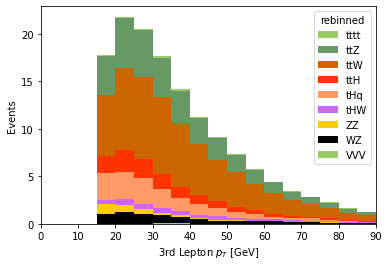

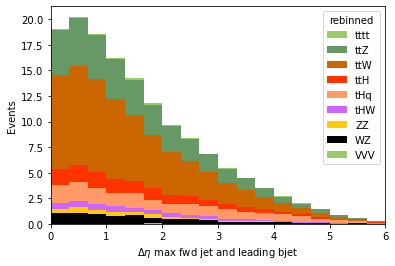

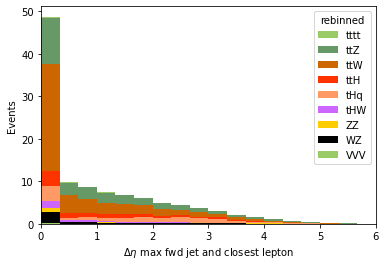

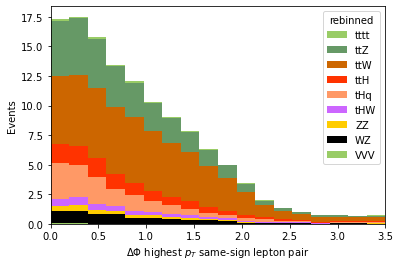

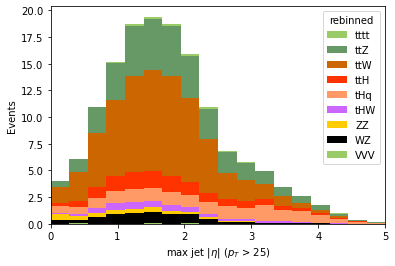

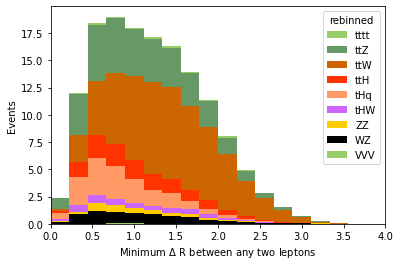

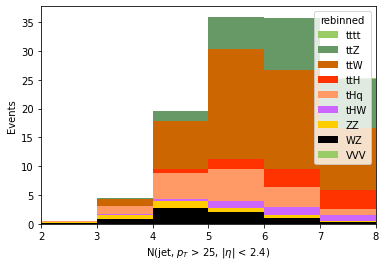

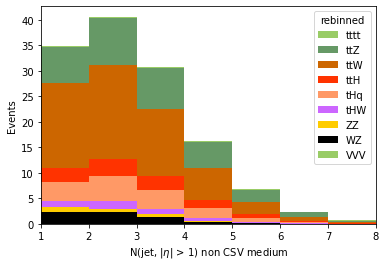

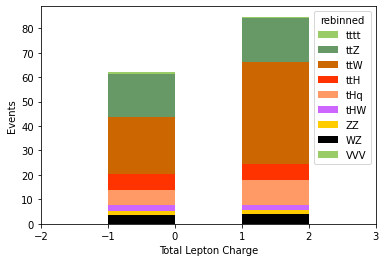

In [7]:
print('Three Lepton Channel')
for key in output[0]['hists'].keys():
    if key.startswith('lll_'):
        fig, ax = plt.subplots(1)
        ax.set_prop_cycle(cycler(color=colors))
        hist.plot1d(output[0]['hists'][key], overlay=overlay, stack=stack, ax=ax, clear=clear, fill_opts=fill_opts)

Two SS Lepton Channel


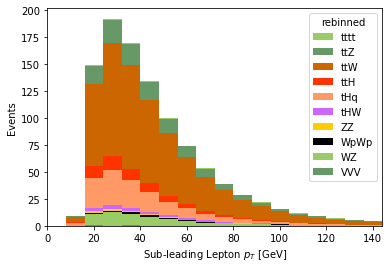

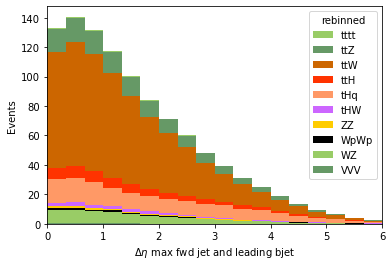

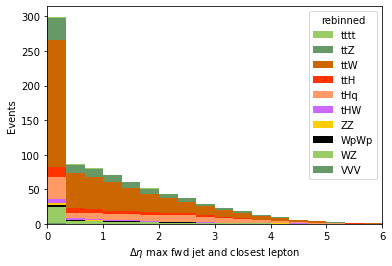

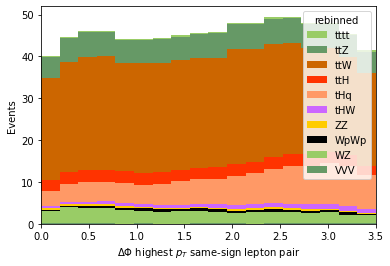

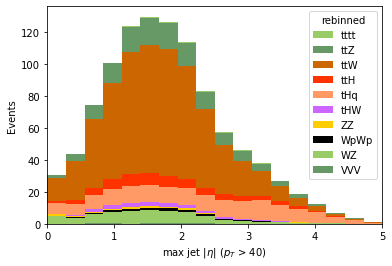

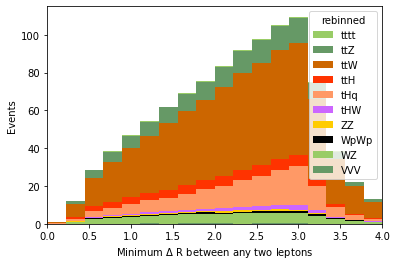

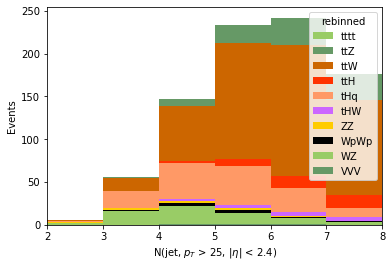

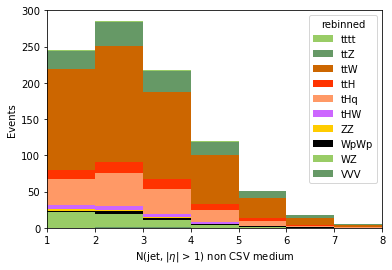

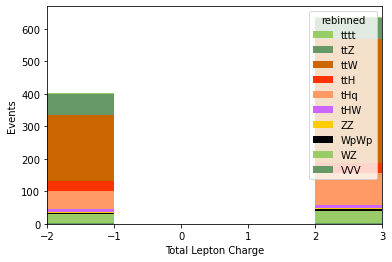

In [8]:
print('Two SS Lepton Channel')
for key in output[0]['hists'].keys():
    if key.startswith('ll_'):
        fig, ax = plt.subplots(1)
        ax.set_prop_cycle(cycler(color=colors))
        hist.plot1d(output[0]['hists'][key], overlay=overlay, stack=stack, ax=ax, clear=clear, fill_opts=fill_opts)

In [9]:
for key, value in output[0]['cutflow'].items():
    print(key, value)

all events 79470927


In [10]:
for key in output[0].keys():
    if isinstance(output[0][key], processor.column_accumulator):
        print(key, output[0][key].value.size)

ll_nJet25 445716
ll_MaxEtaJet25 445716
ll_totCharge 445716
ll_nJetEta1 445716
ll_detaFwdJetBJet 445716
ll_detaFwdJetClosestLep 445716
ll_dphiHighestPtSSPair 445716
ll_minDRll 445716
ll_Lep2Pt 445716
ll_dataset 445716
lll_nJet25 83303
lll_MaxEtaJet25 83303
lll_totCharge 83303
lll_nJetEta1 83303
lll_detaFwdJetBJet 83303
lll_detaFwdJetClosestLep 83303
lll_dphiHighestPtSSPair 83303
lll_minDRll 83303
lll_Lep3Pt 83303
lll_dataset 83303


In [11]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Initialize data into the output datasets.
df_ll = pd.DataFrame()
df_lll = pd.DataFrame()
for key in output[0]:
    if key.startswith('ll_'):
        df_ll[key] = output[0][key].value
    elif key.startswith('lll_'):
        df_lll[key] = output[0][key].value

# Temporarily select only datasets used in BDT training.
df_ll_trainset = df_ll[(df_ll['ll_dataset'] == 'tHq') | (df_ll['ll_dataset'] == 'ttZ') | (df_ll['ll_dataset'] == 'ttW')]
df_ll_exclude = df_ll.drop(df_ll_trainset.index)
df_lll_trainset = df_lll[(df_lll['lll_dataset'] == 'tHq') | (df_lll['lll_dataset'] == 'ttZ') | (df_lll['lll_dataset'] == 'ttW')]
df_lll_exclude = df_lll.drop(df_lll_trainset.index)

# Split target and features of the training set.
ll_trainset_target = df_ll_trainset['ll_dataset']
ll_trainset_features = df_ll_trainset.drop('ll_dataset', axis=1)
lll_trainset_target = df_lll_trainset['lll_dataset']
lll_trainset_features = df_lll_trainset.drop('lll_dataset', axis=1)

df_ll_trainset

,ll_nJet25,ll_MaxEtaJet25,ll_totCharge,ll_nJetEta1,ll_detaFwdJetBJet,ll_detaFwdJetClosestLep,ll_dphiHighestPtSSPair,ll_minDRll,ll_Lep2Pt,ll_dataset
0,4.0,1.286133,-2.0,3.0,1.858398,2.417236,0.345703,0.538282,28.280523,tHq
1,4.0,3.254395,-2.0,1.0,3.684143,2.501709,1.532959,2.172511,65.716484,tHq
2,5.0,2.841797,2.0,3.0,0.339417,0.769836,3.428711,2.890542,28.969772,tHq
3,8.0,3.270508,2.0,4.0,2.105133,1.955107,4.287109,2.020141,60.449986,tHq
4,5.0,3.765137,-2.0,4.0,4.641724,4.375000,1.899170,2.308433,28.137655,tHq
...,...,...,...,...,...,...,...,...,...,...
445452,5.0,2.735352,-2.0,5.0,2.370605,0.924072,3.663574,4.046768,36.906200,ttW
445453,7.0,2.129395,2.0,3.0,1.443726,-1.891113,3.810303,3.103054,22.874945,ttW
445454,6.0,0.421387,2.0,0.0,0.701172,-0.000916,3.119629,3.206235,80.452599,ttW
445455,8.0,2.327148,2.0,3.0,2.750610,0.569580,3.938965,2.371422,32.839375,ttW


In [12]:
from sklearn.model_selection import train_test_split
import xgboost as xgb

# Split the training set into training and test subsets; the training subset is the full training set, while the test subset needs to be merged with the non-training set data.
# In short: training set is (tHq, ttW, ttZ). Split into test and train. Take test, add back all other backgrounds. Take train - it is complete.
ll_train_X, ll_trainset_test_X, ll_train_y, ll_trainset_test_y = train_test_split(ll_trainset_features, ll_trainset_target, test_size=0.5)
lll_train_X, lll_trainset_test_X, lll_train_y, lll_trainset_test_y = train_test_split(lll_trainset_features, lll_trainset_target, test_size=0.5)

# Add extra datasets back to testing sets.
# First, we merge the features and target of the training set's test split, to maintain data integrity when we add back backgrounds and shuffle.
ll_testset = ll_trainset_test_X
ll_testset['ll_dataset'] = ll_trainset_test_y
lll_testset = lll_trainset_test_X
lll_testset['lll_dataset'] = lll_trainset_test_y

# Add back backgrounds.
ll_testset = ll_testset.append(df_ll_exclude)
lll_testset = lll_testset.append(df_lll_exclude)

# Reshuffle.
ll_testset = ll_testset.sample(frac=1)
lll_testset = lll_testset.sample(frac=1)

# Split into target and features again, for thetest set.
ll_test_y = ll_testset['ll_dataset']
ll_test_X = ll_testset.drop('ll_dataset', axis=1)
lll_test_y = lll_testset['lll_dataset']
lll_test_X = lll_testset.drop('lll_dataset', axis=1)

# Convert all sets into binary signal/background. Background is 0, signal is 1.
ll_train_y = np.where(((ll_train_y == 'tHq') | (ll_train_y == 'tHW')), 1, 0)
lll_train_y = np.where(((lll_train_y == 'tHq') | (lll_train_y == 'tHW')), 1, 0)
ll_test_y = np.where(((ll_test_y == 'tHq') | (ll_test_y == 'tHW')), 1, 0)
lll_test_y = np.where(((lll_test_y == 'tHq') | (lll_test_y == 'tHW')), 1, 0)

# Generate DMatrix for use in xgboost.
ll_train_dmat = xgb.DMatrix(data=ll_train_X.values, label=ll_train_y)
ll_test_dmat = xgb.DMatrix(data=ll_test_X.values, label=ll_test_y)
lll_train_dmat = xgb.DMatrix(data=lll_train_X.values, label=lll_train_y)
lll_test_dmat = xgb.DMatrix(data=lll_test_X.values, label=lll_test_y)

<ipython-input-12-8454a1f0b440>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ll_testset['ll_dataset'] = ll_trainset_test_y
<ipython-input-12-8454a1f0b440>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lll_testset['lll_dataset'] = lll_trainset_test_y


In [13]:
# Initialize parameters.
n_estimators = 800
sampling_method = 'gradient_based'
eta = 0.1
max_depth = 3
params = {'sampling_method': sampling_method, 'eta': eta, 'max_depth': max_depth}

# Run BDTs.
ll_xg_reg = xgb.train(params, ll_train_dmat, n_estimators)
ll_preds = ll_xg_reg.predict(ll_test_dmat)
lll_xg_reg = xgb.train(params, lll_train_dmat, n_estimators)
lll_preds = lll_xg_reg.predict(lll_test_dmat)

ll_preds, lll_preds

(array([ 0.1593782 , -0.01094237,  0.3462674 , ...,  0.01712358,
         0.04915088,  0.02122907], dtype=float32),
 array([-0.03153034,  0.02329806,  0.02021468, ...,  0.00662548,
         0.04153866,  0.01574154], dtype=float32))

In [14]:
df_ll.columns, ll_xg_reg.get_score(importance_type='gain'), lll_xg_reg.get_score(importance_type='gain')

(Index(['ll_nJet25', 'll_MaxEtaJet25', 'll_totCharge', 'll_nJetEta1',
        'll_detaFwdJetBJet', 'll_detaFwdJetClosestLep',
        'll_dphiHighestPtSSPair', 'll_minDRll', 'll_Lep2Pt', 'll_dataset'],
       dtype='object'),
 {'f0': 6.2784366466177595,
  'f1': 2.5063964145442363,
  'f4': 1.0010909334868052,
  'f5': 1.0238826643005403,
  'f3': 1.5476471444979996,
  'f6': 0.8531182763784878,
  'f8': 0.530947987435206,
  'f7': 0.49110559002595616,
  'f2': 0.7783321468513514},
 {'f0': 0.6655166637228807,
  'f1': 0.3922605745903074,
  'f5': 0.30089421283866513,
  'f7': 0.43234317053481375,
  'f8': 0.23286346766899713,
  'f4': 0.22652217431466629,
  'f6': 0.20722982539487084,
  'f3': 0.23993207668440672,
  'f2': 0.17106650233439996})

distributed.client - ERROR - Failed to reconnect to scheduler after 10.00 seconds, closing client
_GatheringFuture exception was never retrieved
future: <_GatheringFuture finished exception=CancelledError()>
asyncio.exceptions.CancelledError
